# Ethan's notebook
Used for building additional visuals

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from helper_code import *
print("import successful")

import successful


In [2]:
from eng_helper_code import *
print("import successful")

import successful


# Part 1 : Loading in Datasets

# Load National Survey on Drug Use and Health Datasets

In [3]:
NSDUH2018df = buildNSDUH2018df()
NSDUH2019df = buildNSDUH2019df()
NSDUH2021df = buildNSDUH2021df()
print(NSDUH2018df.head())
print(NSDUH2019df.head())
print(NSDUH2021df.head())

     age  sex  in_hospital  on_medication  school  like_school  self_group  \
0  35-49    2          2.0            2.0     NaN          NaN         NaN   
1  18-25    2          2.0            2.0     NaN          NaN         NaN   
2  18-25    2          2.0            2.0     NaN          NaN         NaN   
3  26-34    2          2.0            1.0     NaN          NaN         NaN   
4  26-34    1          2.0            2.0     NaN          NaN         NaN   

   nervous_last30  hopeless_last30  depressed_last30  ...  worse_hopeless  \
0             5.0              5.0               5.0  ...             NaN   
1             4.0              5.0               5.0  ...             NaN   
2             2.0              3.0               3.0  ...             2.0   
3             4.0              5.0               5.0  ...             NaN   
4             5.0              5.0               5.0  ...             NaN   

   worse_depressed  worse_worthless  diff_concentration  diff_leavin

# Load Core Trends Datasets

In [4]:
coreTrends2018df = buildCoreTrends2018df()
coreTrends2019df = buildCoreTrends2019df()
coreTrends2021df = buildCoreTrends2021df()
print(coreTrends2018df.head())
print(coreTrends2019df.head())
print(coreTrends2021df.head())

   Web_Twitter  Web_Instagram  Web_Facebook  Web_Snapchat  Web_YouTube  \
0          2.0            1.0           1.0           1.0          1.0   
1          2.0            2.0           2.0           2.0          2.0   
3          2.0            2.0           1.0           2.0          2.0   
4          2.0            2.0           1.0           2.0          1.0   
5          1.0            2.0           1.0           2.0          1.0   

   Sns_Instagram  Sns_Facebook  Sns_Snapchat  Sns_YouTube  sex  age  
0            1.0           1.0           3.0          3.0    2   33  
1            NaN           NaN           NaN          NaN    2   76  
3            NaN           3.0           NaN          NaN    2   60  
4            NaN           3.0           NaN          2.0    1   55  
5            NaN           1.0           NaN          3.0    1   58  
   Web_Twitter  Web_Instagram  Web_Facebook  Web_Snapchat  Web_YouTube  \
0            2              2             1             2    

# Part 2 : Visual Graphs

# Graph 1: People by age and frequency of social media usage
This first shows people by age, and their frequency of social media usage.\
Each line shows the data from each year

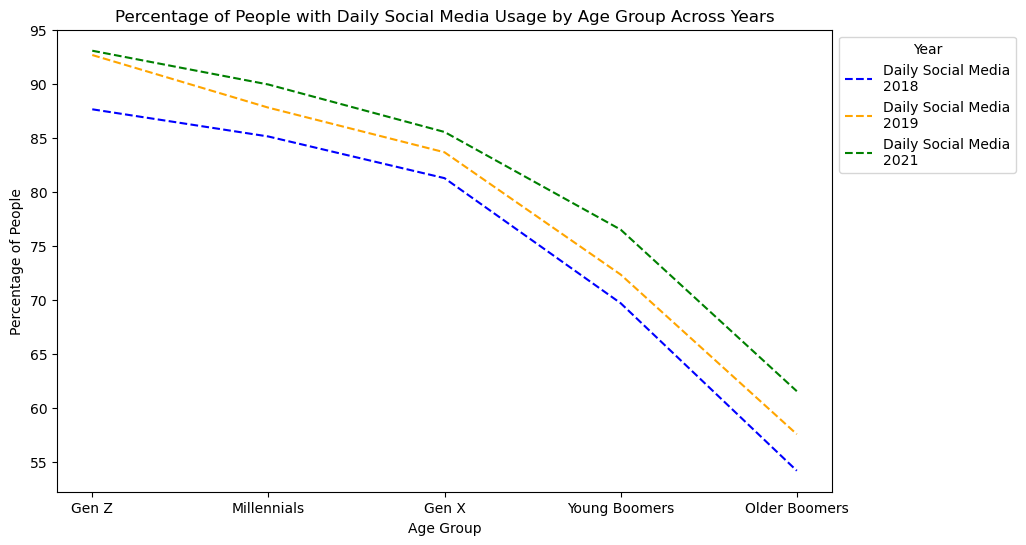

In [5]:
# snsPlot
# Input
# DataFrame: The DataFrame containing the data to be plotted.
# label: A string label representing the year for the plot.
# ax: The axis object for plotting the data.
# Optional Inputs
# color: String specifying the color of the plotted line. Default is 'blue'.
# linestyle: String specifying the style of the plotted line. Default is '--'.
# Graph Type
# Line plot showing the percentage of people with daily social media usage by age group across years. 
# It helps visualize the trend of social media usage across different age groups over time.
def snsPlot(df, label, ax, color='blue', linestyle='--'):
    sns_columns = df.filter(like='Sns_').columns
    df['sns_use'] = df[sns_columns].min(axis=1)
    df['age_group'] = pd.cut(df['age'], bins=[0, 25, 34, 49, 64, float('inf')], labels=['Gen Z', 'Millennials', 'Gen X', 'Young Boomers', 'Older Boomers'])
    high_sns = df[df['sns_use'] <= 2.0].groupby('age_group').size().reset_index(name='high_sns_count')
    total_counts = df.groupby('age_group').size().reset_index(name='total')
    high_sns = pd.merge(high_sns, total_counts, on='age_group', how='right')
    high_sns['percentage'] = (high_sns['high_sns_count'] / high_sns['total']) * 100
    high_sns['smoothed_percentage'] = high_sns['percentage'].rolling(window=3, min_periods=1).mean()
    sns.lineplot(data=high_sns, x='age_group', y='smoothed_percentage', ax=ax, label=f"Daily Social Media\n{label}", color=color, linestyle=linestyle)

fig, ax = plt.subplots(figsize=(10, 6))
snsPlot(coreTrends2018df, '2018', ax, 'blue')
snsPlot(coreTrends2019df, '2019', ax, 'orange')
snsPlot(coreTrends2021df, '2021', ax, 'green')
plt.title('Percentage of People with Daily Social Media Usage by Age Group Across Years')
plt.xlabel('Age Group')
plt.ylabel('Percentage of People')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1,1))
plt.show()

# Graph 2: People by Age and Mental health that affects social activities 
This second graph shows the percentage of people by age that have mental health issues that affect their social activities

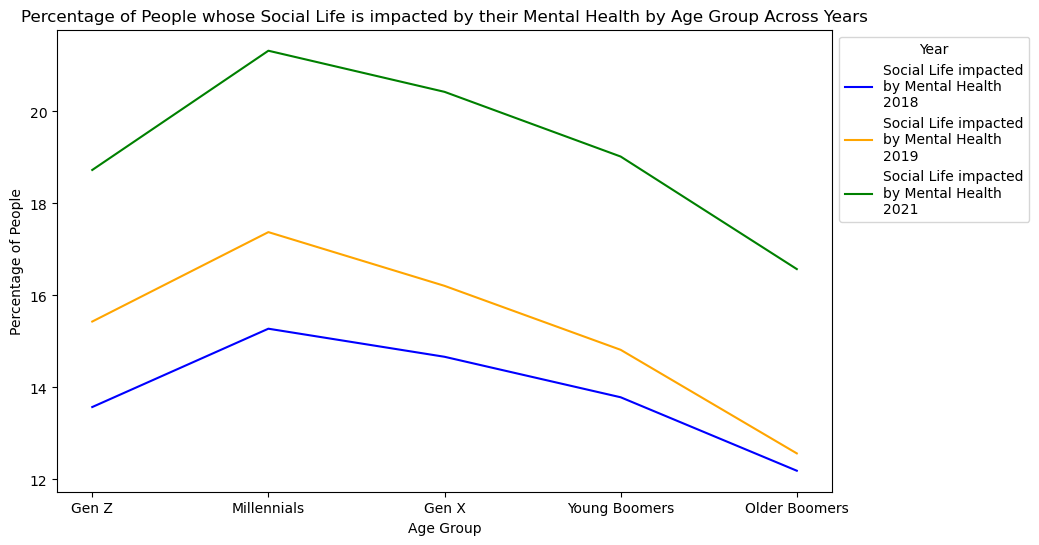

In [21]:
# diffSocialPlot
# Input
# DataFrame: The DataFrame containing the data to be plotted.
# ax: The axis object for plotting the data.
# label: A string label representing the year for the plot.
# Optional Inputs
# color: String specifying the color of the plotted line. Default is 'blue'.
# linestyle: String specifying the style of the plotted line. Default is '-'.
# Graph Type
# Line plot displaying the percentage of people whose social life is impacted by their mental health by age group across years. 
# It illustrates how mental health affects social life across different age groups over time.
def diffSocialPlot(df, ax, label, color='blue', linestyle='-'):
    genMap = {'18-25': 'Gen Z', '26-34': 'Millennials', '35-49': 'Gen X', '50-64': 'Young Boomers', '65+': 'Older Boomers'}
    df['generation'] = df['age'].map(genMap)
    df['diff_social_high'] = (df['diff_social']) >= 3
    group_counts = df.groupby('generation')['diff_social_high'].sum()
    total_counts = df.groupby('generation').size()
    percentages = (group_counts / total_counts) * 100
    plot_data = pd.DataFrame({'Age Group': percentages.index, 'Percentage': percentages.values})
    plot_data['Moving Avg'] = plot_data['Percentage'].rolling(window=3, min_periods=1).mean()
    sns.lineplot(data=plot_data, x='Age Group', y='Moving Avg', ax=ax, label=f"Social Life impacted\nby Mental Health\n{label}", color=color, linestyle=linestyle)

fig, ax = plt.subplots(figsize=(10, 6))
diffSocialPlot(NSDUH2018df, ax, '2018', 'blue')
diffSocialPlot(NSDUH2019df, ax, '2019', 'orange')
diffSocialPlot(NSDUH2021df, ax, '2021', 'green')
plt.title('Percentage of People whose Social Life is impacted by their Mental Health by Age Group Across Years')
plt.xlabel('Age Group')
plt.ylabel('Percentage of People')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1,1))
plt.show()

# Graph 3: Combining Graphs 1 and 2 to show a Correlation between Social Media Usage and Mental Health affecting Social Activities

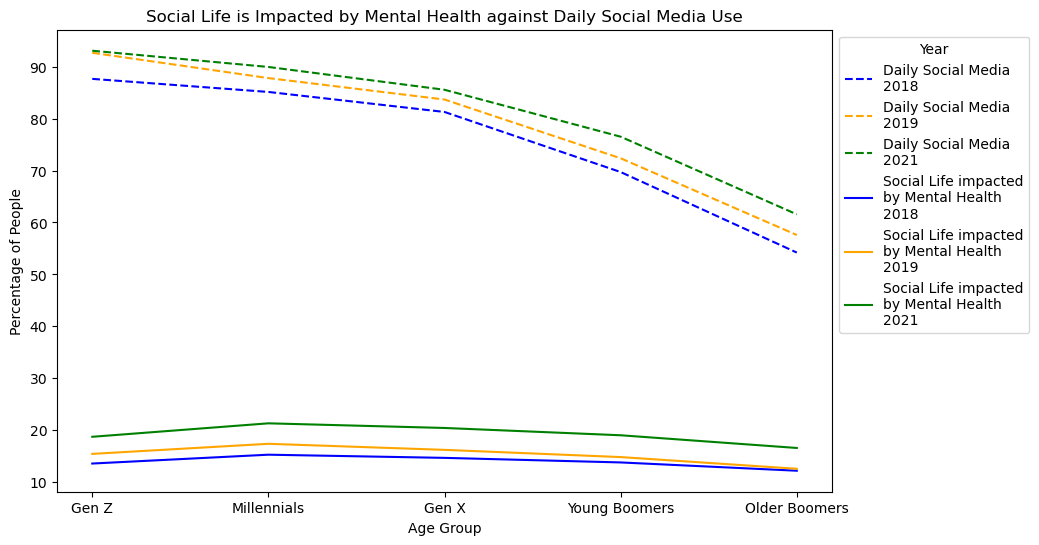

In [7]:
# Create a single figure and axis for all plots
fig, ax = plt.subplots(figsize=(10, 6))

# Call snsPlot for each DataFrame and year
snsPlot(coreTrends2018df, '2018', ax, 'blue')
snsPlot(coreTrends2019df, '2019', ax, 'orange')
snsPlot(coreTrends2021df, '2021', ax, 'green')

# Call diffSocialPlot for each DataFrame and year, using the same axis
diffSocialPlot(NSDUH2018df, ax, '2018', 'blue')
diffSocialPlot(NSDUH2019df, ax, '2019', 'orange')
diffSocialPlot(NSDUH2021df, ax, '2021', 'green')

# Set the title and labels, and show the legend
sns.set_palette("dark")
plt.title('Social Life is Impacted by Mental Health against Daily Social Media Use')
plt.xlabel('Age Group')
plt.ylabel('Percentage of People')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1,1))

# Show the plot
plt.show()

# Graph 4 : People by and Age and Feelings of Worthlessness

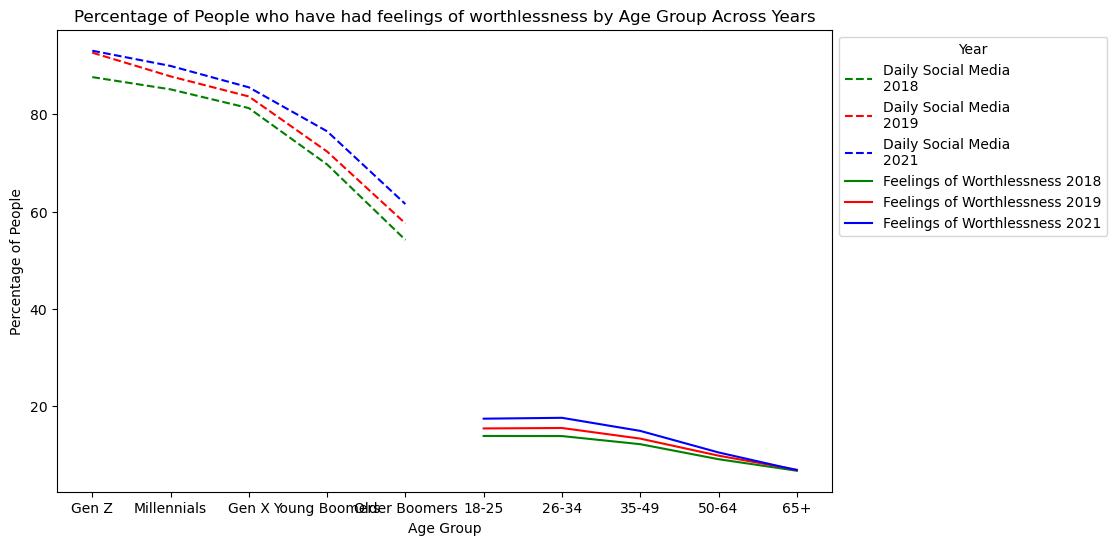

In [8]:
def worthlessPlot(df, ax, label, color='blue', linestyle='-'):
    # Determine if worse_worthless is 3 or higher
    df['worthless_high'] = df['worse_worthless'] <= 3

    # Group by age and count how many meet the criteria
    group_counts = df.groupby('age')['worthless_high'].sum()

    # Calculate total people in each age group
    total_counts = df.groupby('age').size()

    # Calculate the percentage
    percentages = (group_counts / total_counts) * 100

    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({
        'Age Group': percentages.index,
        'Percentage': percentages.values
    })

    # Calculate moving average for smoothing (e.g., over 3 data points)
    plot_data['Moving Avg'] = plot_data['Percentage'].rolling(window=3, min_periods=1).mean()

    # Plot using seaborn with optional smoothing on the given axis
    sns.lineplot(data=plot_data, x='Age Group', y='Moving Avg', ax=ax, label=f"Feelings of Worthlessness {label}", color=color, linestyle=linestyle)

# Create a single figure and axis for all plots
fig, ax = plt.subplots(figsize=(10, 6))

# Call snsPlot for each DataFrame and year
snsPlot(coreTrends2018df, '2018', ax, 'green')
snsPlot(coreTrends2019df, '2019', ax, 'red')
snsPlot(coreTrends2021df, '2021', ax, 'blue')

# Call diffSocialPlot for each DataFrame and year, using the same axis
worthlessPlot(NSDUH2018df, ax, '2018', 'green', '-')
worthlessPlot(NSDUH2019df, ax, '2019', 'red', '-')
worthlessPlot(NSDUH2021df, ax, '2021', 'blue', '-')

# Set the title and labels, and show the legend
plt.title('Percentage of People who have had feelings of worthlessness by Age Group Across Years')
plt.xlabel('Age Group')
plt.ylabel('Percentage of People')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1,1))

# Show the plot
plt.show()

# Graph Alternatives

First combining all data sets, with a column which states the year

In [9]:
coreTrends2018df['year'] = "2018"
coreTrends2019df['year'] = "2019"
coreTrends2021df['year'] = "2021"

coreTrendsAlldf = pd.concat([coreTrends2018df, coreTrends2019df, coreTrends2021df])
print(coreTrendsAlldf.head())

   Web_Twitter  Web_Instagram  Web_Facebook  Web_Snapchat  Web_YouTube  \
0          2.0            1.0           1.0           1.0          1.0   
1          2.0            2.0           2.0           2.0          2.0   
3          2.0            2.0           1.0           2.0          2.0   
4          2.0            2.0           1.0           2.0          1.0   
5          1.0            2.0           1.0           2.0          1.0   

   Sns_Instagram  Sns_Facebook  Sns_Snapchat  Sns_YouTube  sex  age  sns_use  \
0            1.0           1.0           3.0          3.0    2   33      1.0   
1            NaN           NaN           NaN          NaN    2   76      NaN   
3            NaN           3.0           NaN          NaN    2   60      3.0   
4            NaN           3.0           NaN          2.0    1   55      2.0   
5            NaN           1.0           NaN          3.0    1   58      1.0   

       age_group  year  
0    Millennials  2018  
1  Older Boomers  2018  

In [10]:
NSDUH2018df['year'] = "2018"
NSDUH2019df['year'] = "2019"
NSDUH2021df['year'] = "2021"

NSDUHAlldf = pd.concat([NSDUH2018df, NSDUH2019df, NSDUH2021df])
print(NSDUHAlldf.head())

     age  sex  in_hospital  on_medication  school  like_school  self_group  \
0  35-49    2          2.0            2.0     NaN          NaN         NaN   
1  18-25    2          2.0            2.0     NaN          NaN         NaN   
2  18-25    2          2.0            2.0     NaN          NaN         NaN   
3  26-34    2          2.0            1.0     NaN          NaN         NaN   
4  26-34    1          2.0            2.0     NaN          NaN         NaN   

   nervous_last30  hopeless_last30  depressed_last30  ...  diff_strangers  \
0             5.0              5.0               5.0  ...             NaN   
1             4.0              5.0               5.0  ...             1.0   
2             2.0              3.0               3.0  ...             3.0   
3             4.0              5.0               5.0  ...             2.0   
4             5.0              5.0               5.0  ...             NaN   

   diff_social  diff_social2  suicidal_think  sad_period   generatio

# Graph 1b

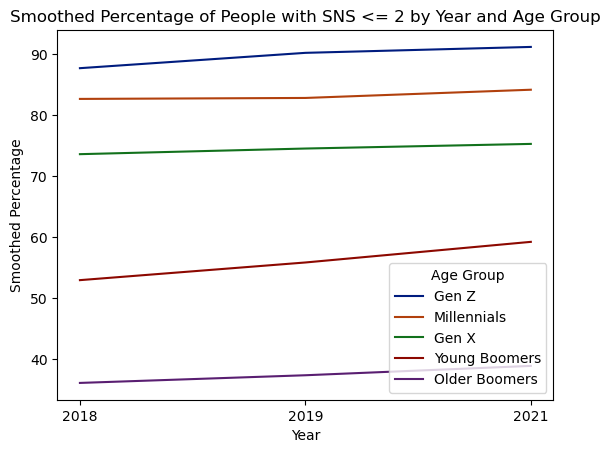

In [11]:
def snsAllPlot(df, window=3):
    # Calculating sns_sum only if it is not already calculated in your data
    sns_columns = df.filter(like='Sns_').columns
    df['sns_min'] = df[sns_columns].min(axis=1)

    # Grouping by year and age_group
    grouped = df.groupby(['year', 'age_group'])

    # Calculating the percentage of people with sns_sum >= 5
    percentage_df = grouped.apply(lambda x: (x['sns_min'] <= 2).mean() * 100).reset_index()
    percentage_df.columns = ['year', 'age_group', 'percentage']

    # Sorting the data to ensure the rolling mean is applied correctly
    percentage_df.sort_values(by=['age_group', 'year'], inplace=True)

    # Calculating the moving average
    percentage_df['smoothed_percentage'] = percentage_df.groupby('age_group')['percentage'].rolling(window=window, min_periods=1).mean().reset_index(level=0, drop=True)

    # Plotting using the smoothed data
    sns.lineplot(x='year', y='smoothed_percentage', hue='age_group', data=percentage_df)
    plt.title('Smoothed Percentage of People with SNS <= 2 by Year and Age Group')
    plt.xlabel('Year')
    plt.ylabel('Smoothed Percentage')
    plt.legend(title='Age Group')
    plt.show()

    
snsAllPlot(coreTrendsAlldf)

# Graph 2b

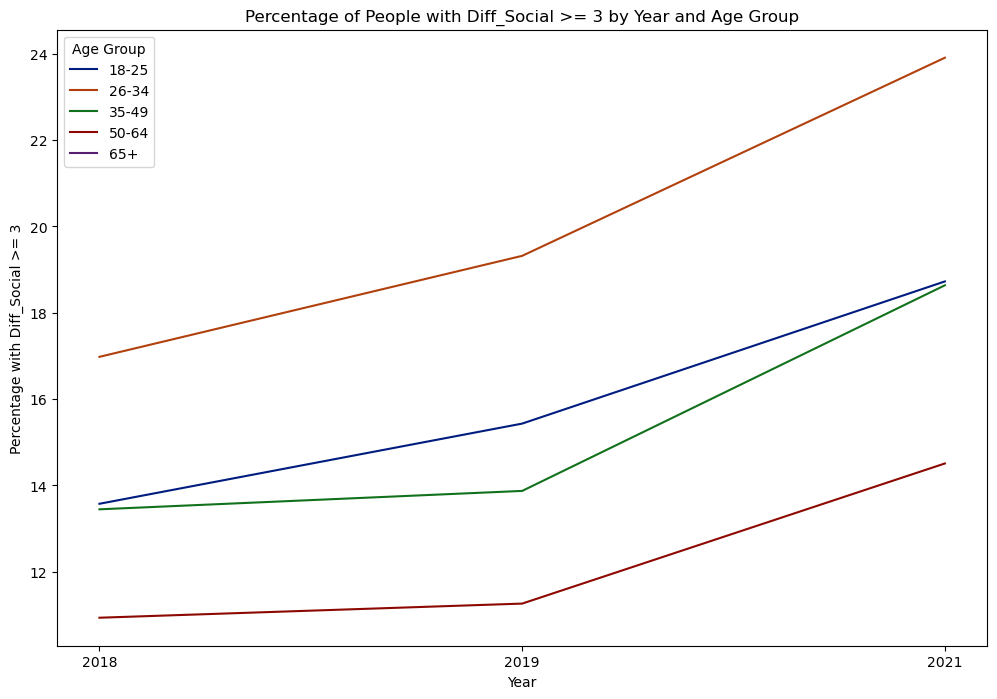

In [12]:
def diffSocialAllPlot(df):
    # Define a new column to check if diff_social is 3 or higher
    df['diff_social_high'] = df['diff_social'] >= 3

    # Group by year and age, calculate total and number meeting criteria
    grouped = df.groupby(['year', 'age']).agg(
        total=('diff_social_high', 'size'),
        high_social_count=('diff_social_high', 'sum')
    ).reset_index()

    # Calculate percentage
    grouped['percentage'] = (grouped['high_social_count'] / grouped['total']) * 100

    # Plotting
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=grouped, x='year', y='percentage', hue='age')
    plt.title('Percentage of People with Diff_Social >= 3 by Year and Age Group')
    plt.xlabel('Year')
    plt.ylabel('Percentage with Diff_Social >= 3')
    plt.legend(title='Age Group')

    # Show the plot
    plt.show()

    
diffSocialAllPlot(NSDUHAlldf)

# Graph 5 : Suicidal Thoughts 

The goal of this graph is to find a way of portraying the relationship between Suicidal Thoughts and Social Media use

In [13]:
# Rebuild Fresh Datasets
coreTrends2018df = buildCoreTrends2018df()
coreTrends2019df = buildCoreTrends2019df()
coreTrends2021df = buildCoreTrends2021df()

NSDUH2018df = buildNSDUH2018df()
NSDUH2019df = buildNSDUH2019df()
NSDUH2021df = buildNSDUH2021df()

# Merge Datasets
coreTrends2018df['year'] = "2018"
coreTrends2019df['year'] = "2019"
coreTrends2021df['year'] = "2021"

NSDUH2018df['year'] = "2018"
NSDUH2019df['year'] = "2019"
NSDUH2021df['year'] = "2021"

NSDUHAlldf = pd.concat([NSDUH2018df, NSDUH2019df, NSDUH2021df])
print(NSDUHAlldf.head())

coreTrendsAlldf = pd.concat([coreTrends2018df, coreTrends2019df, coreTrends2021df])
print(coreTrendsAlldf.head())


     age  sex  in_hospital  on_medication  school  like_school  self_group  \
0  35-49    2          2.0            2.0     NaN          NaN         NaN   
1  18-25    2          2.0            2.0     NaN          NaN         NaN   
2  18-25    2          2.0            2.0     NaN          NaN         NaN   
3  26-34    2          2.0            1.0     NaN          NaN         NaN   
4  26-34    1          2.0            2.0     NaN          NaN         NaN   

   nervous_last30  hopeless_last30  depressed_last30  ...  worse_worthless  \
0             5.0              5.0               5.0  ...              NaN   
1             4.0              5.0               5.0  ...              NaN   
2             2.0              3.0               3.0  ...              1.0   
3             4.0              5.0               5.0  ...              NaN   
4             5.0              5.0               5.0  ...              NaN   

   diff_concentration  diff_leaving_house  diff_strangers  dif

In [14]:
# Build Dataset for Suicidal Thoughts
suicidalThoughtsdf = NSDUHAlldf.filter(['age', 'year', 'suicidal_think'])

# only have rows where they answered yes
suicidalThoughtsdf = suicidalThoughtsdf[suicidalThoughtsdf['suicidal_think'] == 1]

# drop 65 + cause there are none
suicidalThoughtsdf = suicidalThoughtsdf[suicidalThoughtsdf['age'] != '65+']
count_data = suicidalThoughtsdf.groupby(['age', 'year']).size().reset_index(name='count')
print(count_data)
print(suicidalThoughtsdf.head(10))

      age  year  count
0   18-25  2018   1795
1   18-25  2019   2082
2   18-25  2021   1928
3   26-34  2018    727
4   26-34  2019    762
5   26-34  2021    916
6   35-49  2018    148
7   35-49  2019    152
8   35-49  2021    150
9   50-64  2018     69
10  50-64  2019     75
11  50-64  2021     61
12    65+  2018      0
13    65+  2019      0
14    65+  2021      0
       age  year  suicidal_think
2    18-25  2018             1.0
22   26-34  2018             1.0
48   18-25  2018             1.0
85   26-34  2018             1.0
114  18-25  2018             1.0
116  18-25  2018             1.0
219  18-25  2018             1.0
237  18-25  2018             1.0
316  18-25  2018             1.0
339  18-25  2018             1.0


While there is an increase in the 26-34 age group from year to year.
The fluctuating values in the other age groups makes it difficult to determine a relationship between years for the other age groups.

In [15]:
# making a sns graph specifically for comparing with suicidal thoughts
STsnsdf = coreTrendsAlldf.filter(['age', 'year'])
sns_columns = coreTrendsAlldf.filter(like='Sns_').columns
STsnsdf['sns_sum'] = coreTrendsAlldf[sns_columns].sum(axis=1)
# filter only those in the age group
STsnsdf = STsnsdf[STsnsdf['age'] >= 26]
STsnsdf = STsnsdf[STsnsdf['age'] <= 34]
print(STsnsdf.head(), STsnsdf.count())

     age  year  sns_sum
0     33  2018      8.0
17    30  2018     13.0
40    34  2018     10.0
70    30  2018      4.0
103   32  2018      2.0 age        596
year       596
sns_sum    596
dtype: int64


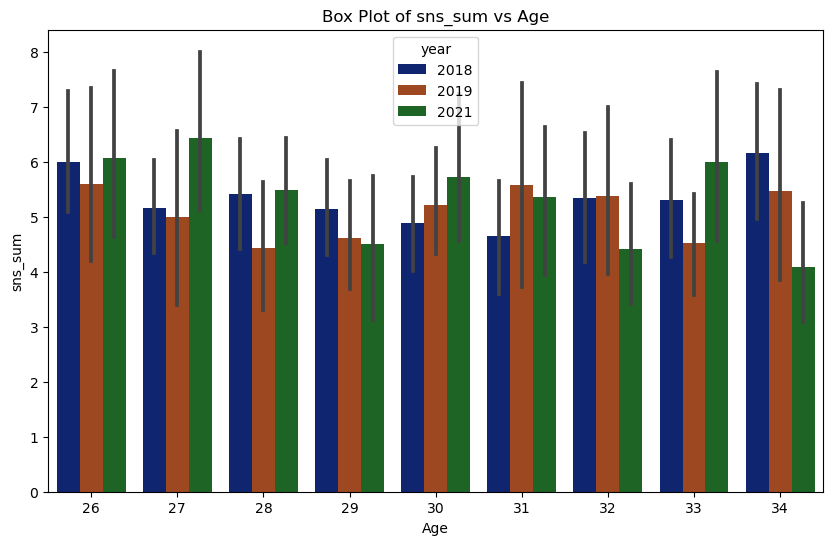

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=STsnsdf, x='age', y='sns_sum', hue='year')
plt.title('Box Plot of sns_sum vs Age')
plt.xlabel('Age')
plt.ylabel('sns_sum')
plt.show()

Comparing the social media usage between the yearas for the 26-34 age group, there doesn't seem to be a consistent pattern in any of it connect it to suicidal thoughts.

# Graph 6 : Frequency of Social Media Usage Across Generations

In [17]:
print(coreTrendsAlldf.head())

   Web_Twitter  Web_Instagram  Web_Facebook  Web_Snapchat  Web_YouTube  \
0          2.0            1.0           1.0           1.0          1.0   
1          2.0            2.0           2.0           2.0          2.0   
3          2.0            2.0           1.0           2.0          2.0   
4          2.0            2.0           1.0           2.0          1.0   
5          1.0            2.0           1.0           2.0          1.0   

   Sns_Instagram  Sns_Facebook  Sns_Snapchat  Sns_YouTube  sex  age  year  
0            1.0           1.0           3.0          3.0    2   33  2018  
1            NaN           NaN           NaN          NaN    2   76  2018  
3            NaN           3.0           NaN          NaN    2   60  2018  
4            NaN           3.0           NaN          2.0    1   55  2018  
5            NaN           1.0           NaN          3.0    1   58  2018  


In [18]:
mapping = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
coreTrendsAlldf['Sns_Instagram'] = coreTrendsAlldf['Sns_Instagram'].map(mapping)
coreTrendsAlldf['Sns_Facebook'] = coreTrendsAlldf['Sns_Facebook'].map(mapping)
coreTrendsAlldf['Sns_Snapchat'] = coreTrendsAlldf['Sns_Snapchat'].map(mapping)
coreTrendsAlldf['Sns_YouTube'] = coreTrendsAlldf['Sns_YouTube'].map(mapping)
coreTrendsAlldf['sns_use'] = coreTrendsAlldf[sns_columns].sum(axis=1)
genSnsFrequency = coreTrendsAlldf.filter(['year', 'sns_use'])
genSnsFrequency['age_group'] = pd.cut(coreTrendsAlldf['age'], bins=[0, 25, 34, 49, 64, float('inf')], labels=['Gen Z', 'Millennials', 'Gen X', 'Young Boomers', 'Older Boomers'])
print(genSnsFrequency.head())

   year  sns_use      age_group
0  2018     16.0    Millennials
1  2018      0.0  Older Boomers
3  2018      3.0  Young Boomers
4  2018      7.0  Young Boomers
5  2018      8.0  Young Boomers


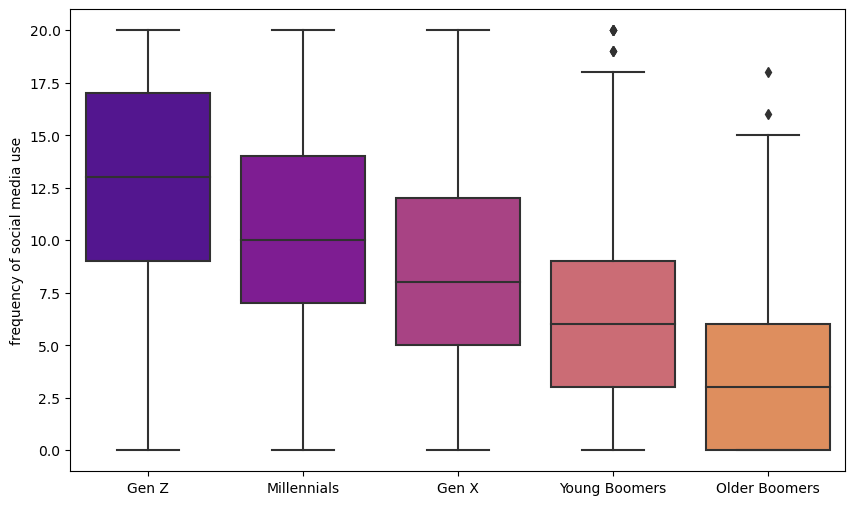

In [19]:
plt.figure(figsize=(10, 6))
sns.set_palette("plasma")
sns.boxplot(data=genSnsFrequency, x='age_group', y='sns_use')
#plt.title('Box Plot of sns_sum vs Age')
plt.ylabel('frequency of social media use')
plt.xlabel('')
plt.show()